## Exercise 2

In this exercise, we will analyze COVID-19 hospital admissions in the UK, and you will fit an exponential curve to understand the rise in hospital admissions in a six week period from late November to early January. 

 The data is in a file called `data_2021-Feb-14.csv` (comma-separated-values format). It was downloaded from the official [website](https://coronavirus.data.gov.uk/) for UK COVID-19 data.


In [44]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use `pandas`, a library for data analysis in Python to load and view the data. Pandas uses a structure called a _data frame_ to represent and manipulate data tables. All the required commands are included here, so you won't need to learn Pandas for this exercise. But if you are interested in learning more, [this](https://pandas.pydata.org/docs/) is a good place to start.

In [46]:
df_hosp = pd.read_csv('/content/drive/MyDrive/IB-Data-Science/Exercises/data_2021-Feb-14.csv')  # Create a data frame by loading data from a csv file
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/data_2021-Feb-14.csv'

df_hosp.head(3)   #display the first three rows

,date,newAdmissions,cumulativeAdmissions
0,23/03/2020,1273,4876
1,24/03/2020,1720,6596
2,25/03/2020,2085,8681


The command `pd.read_csv` loads the data onto a data frame. We have used the `.head()` command to display the top 3 rows of the data frame.

We can also display a random sample of rows from the data frame using `.sample()`, or the last few rows using `.tail()`.

In [47]:
df_hosp.tail(3)

,date,newAdmissions,cumulativeAdmissions
326,12/02/2021,1493,424849
327,13/02/2021,1419,426268
328,14/02/2021,1531,427799


You can plot one column against another by just using their column names. Let us plot the newAdmissions column versus date.

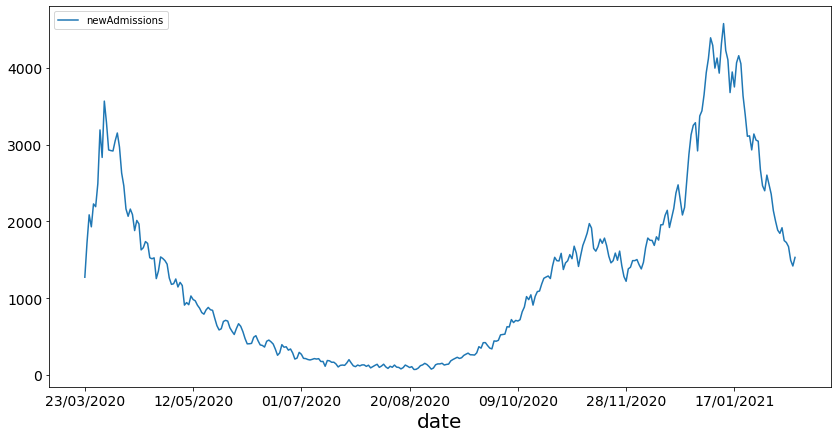

In [48]:
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

df_hosp.plot(x='date', y='newAdmissions')
plt.show()

Note the sharp increase in hospital admissions from late Novemeber to early January (the rise of the 'new variant'). We now extract the rows spanning the dates  28 November to 10 January into a data frame called `df_part`

In [49]:
df_part = df_hosp[250:294]
df_part.head(2)

,date,newAdmissions,cumulativeAdmissions
250,28/11/2020,1220,220585
251,29/11/2020,1382,221967


In [50]:
df_part.tail(2)

,date,newAdmissions,cumulativeAdmissions
292,09/01/2021,4126,323260
293,10/01/2021,3929,327189


We now convert the `newAdmissions` column to a numpy array `yvals`

In [51]:
yvals = np.array(df_part['newAdmissions'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

## 2a) Plot the data `yvals` vs `xvals` in a scatterplot

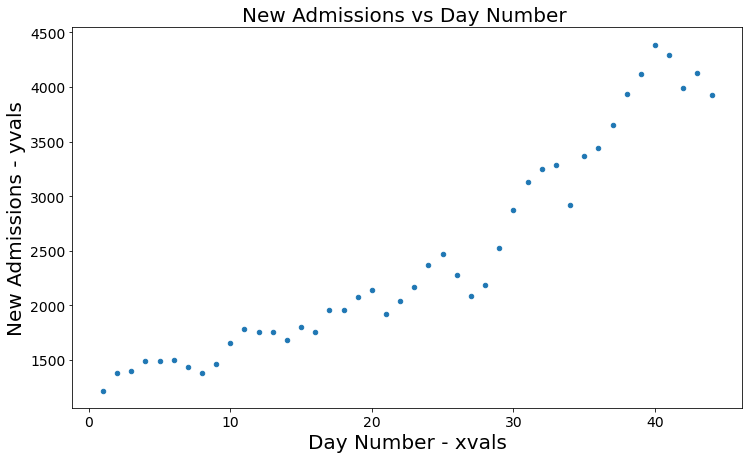

In [52]:
# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(xvals, yvals, s=20)   # s can be used to adjust the size of the dots
plt.xlabel('Day Number - xvals')
plt.ylabel('New Admissions - yvals')
plt.title('New Admissions vs Day Number ')
plt.savefig('yvals vs xvals.pdf', bbox_inches = 'tight')
plt.show()

## 2b) Fit an exponential model to the data 

From our knowledge of how the virus spreads, we know that the number of infections, hospital admissions etc. should (roughly) follow an exponential curve. We would therefore like to fit a model of the form $y = c_1 e^{c_2 x}$, where $y$ is the number of admissions on day $x$. 

Note that this is a linear model on a log-scale for $y$. That is, $\log y = \log c_1 +  c_2 x$.

- Fit a linear model for $\log(\text{yvals})$ vs $\text{xvals}$, and print the values of $c_1$ and $c_2$
- Plot the fit $y = c_1 e^{c_2x}$ along with the scatterplot of the data

Coefficiemts for exponential model: c1 = 1193.9232354884318 	 c2 =  0.029


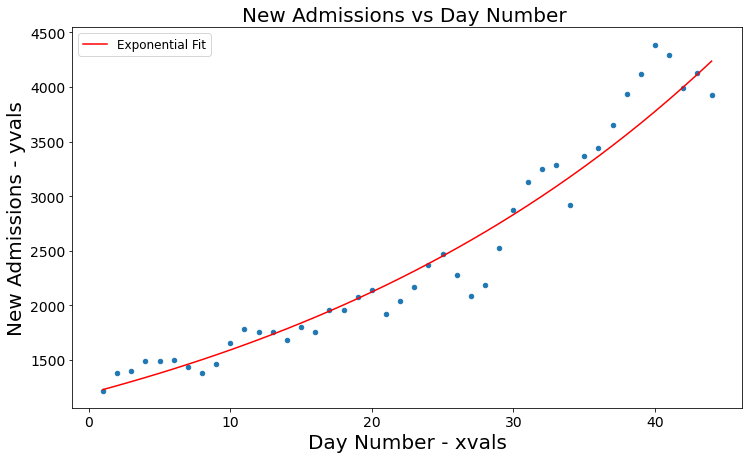

In [55]:
def polyreg(data_matrix, k):
  
  N = np.shape(data_matrix)[0]
  xvals = np.transpose(data_matrix)[0]
  yvals = np.transpose(data_matrix)[1]
  all_ones = np.ones(np.shape(yvals))

  # Create matrix X which contains all ones in first column, and dates in the second
  list = []
  list.append(all_ones)
  if (k<N):
    for i in range(k):
      list.append(xvals**(i+1))
  elif(k>=N):
    for j in range(N-1):
      list.append(xvals**(j+1))
    for i in range(N,k):
      list.append(np.zeros(N))
  list = tuple(list)
  X  = np.column_stack(list)

  # Computing the optimum coefficient vector beta* using the formula
  XT = X.T  # transpose
  beta_lin =  np.linalg.lstsq(X, yvals, rcond=None)[0]

  # Computing the fit of the model
  fit_lin = X.dot(beta_lin)  

  #Compute the residuals
  resid_lin = yvals - fit_lin
  return beta_lin, fit_lin, resid_lin

# Defining the y vector
yvals_log = np.log(yvals)
datamatrix= np.stack((xvals, yvals_log), axis = 1)
fit_log = polyreg(datamatrix,1)[1]
beta = polyreg(datamatrix,1)[0]
beta_0 = beta[0]
beta_1 = beta[1]
print('Coefficiemts for exponential model: c1 =', np.exp(np.round(beta[0], decimals =3)), 
      '\t c2 = ', np.round(beta[1], decimals =3))

fit_exp = np.exp(fit_log)
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(xvals, yvals, s=20)   # s can be used to adjust the size of the dots
plt.plot(xvals, fit_exp, color = 'red', label = 'Exponential Fit')
plt.legend(fontsize = 'large')
plt.xlabel('Day Number - xvals')
plt.ylabel('New Admissions - yvals')
plt.title('New Admissions vs Day Number ')
plt.savefig('exp fit for xvals and yvals.pdf', bbox_inches = 'tight')
plt.show()


## 2c) Estimate the weekly growth rate in hospital admissions (in \%) over this period

_Hint_ : According to the model, admissions increase every 7 days by a factor of 
$(c_1 e^{c_2 (x+7)})/(c_1 e^{c_2 x}) = e^{7c_2}$.

In [56]:
# compute and print weekly growth rate (in %)
c_2 = beta_1
growth_rate = np.round( (np.exp(7*c_2)-1)*100, decimals = 4)
print ("Weekly growth rate in hospital admissions: ", growth_rate, "%")

Weekly growth rate in hospital admissions:  22.336 %
